# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

Objective: Understand the factors influencing the pricing of used cars to offer strategic recommendations for a used car dealership to optimize their inventory based on consumer preferences.

Business Questions:
1) What are the primary factors that influence the pricing of used cars?
- Feature importance analysis - determine the relative importance of each variable in predicting the price of used cars.


2) How do variables such as brand, model, year, mileage, condition, and additional features correlate with the price?
- Analyze the relationship between numerical variables (like year, mileage) and the target variable (price) using correlation coefficients. For categorical variables (like brand, model, condition, additional features), use ANOVA (Analysis of Variance) or similar techniques to assess their impact on price. Correlation for numerical variables, Spearman correlation if non-linear relationships are suspected


3) Can we identify specific trends or patterns in consumer preferences based on historical sales data?
- Uncover underlying trends, patterns, and anomalies in the dataset that could indicate shifts in consumer preferences over time or based on specific features.
- Use descriptive statistics, distribution plots, and clustering techniques to identify patterns in consumer behavior.
Time Series Analysis: If historical sales data include time-related information, apply time series analysis to discover trends, seasonality, and cyclical behaviors in car sales and pricing.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
file_path = 'data/vehicles.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure and the types of data it contains
data.head(), data.info(), data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

(           id                  region  price  year manufacturer model  \
 0  7222695916                prescott   6000   NaN          NaN   NaN   
 1  7218891961            fayetteville  11900   NaN          NaN   NaN   
 2  7221797935            florida keys  21000   NaN          NaN   NaN   
 3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
 4  7210384030              greensboro   4900   NaN          NaN   NaN   
 
   condition cylinders fuel  odometer title_status transmission  VIN drive  \
 0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
 1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
 2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
 3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
 4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
 
   size type paint_color state  
 0  NaN  NaN         NaN    az  
 1  NaN  NaN      

#### The dataset contains the following columns, each representing different attributes of the vehicles listed for sale:

- id: Unique identifier for the listing
- region: The region in which the vehicle is being sold
- price: The price of the vehicle (target variable)
- year: The year of manufacture
- manufacturer: The manufacturer of the vehicle
- model: The model of the vehicle
- condition: The condition of the vehicle
- cylinders: Number of cylinders in the vehicle's engine
- fuel: Type of fuel the vehicle uses
- odometer: Mileage of the vehicle
- title_status: The status of the vehicle's title (e.g., clean, salvage)
- transmission: The type of transmission in the vehicle
- VIN: The vehicle identification number
- drive: Type of drive (e.g., front-wheel, rear-wheel)
- size: Size of the vehicle
- type: The body type of the vehicle
- paint_color: Color of the vehicle
- Zstate: The state in which the vehicle is being sold

### Initial Data Understanding

- Columns and Types: Includes information like region, year, manufacturer, model, odometer, and price. Some fields like year and odometer are numeric, while most others are categorical.
- Missing Values: Many columns have missing values, particularly condition, cylinders, VIN, drive, size, type, and paint_color.

- Statistical Summary:
Price: There are outliers, as the max value is very high compared to the 75th percentile.
Year: Most cars are relatively recent models (median year is 2013).
Odometer: Average mileage on cars is around 98,043 miles.

- Next Steps for Data Understanding
Handle Missing Data: Determine the best strategy for each column with missing data—whether to impute, remove, or keep as is depending on its importance.

- Data Visualization:
    - Price Distribution: Understand how car prices are distributed to identify outliers and patterns.
    - Correlation Heatmap: Identify which features are most strongly correlated with the price.
    - Box Plots by Category: For categorical variables like manufacturer or type, to see how they affect price.

- Addressing Large Dataset Considerations
Due to the large size of the dataset and our need for efficient processing:
Use sampling for initial exploratory data analysis to speed up the process.
Consider using pandas categoricals for memory efficiency when dealing with categorical data.
Opt for batch processing during feature engineering and data cleaning to handle memory and speed issues effectively.

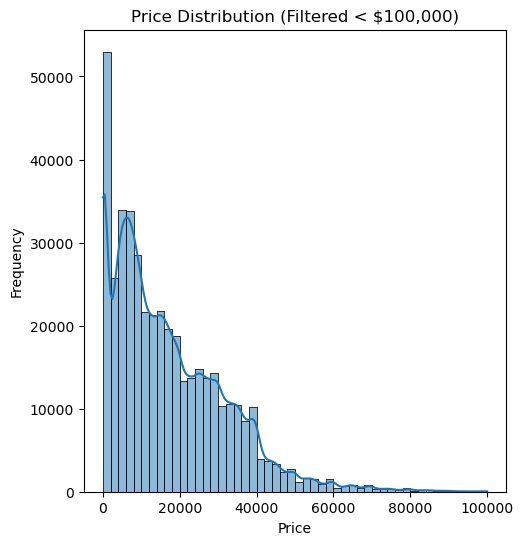

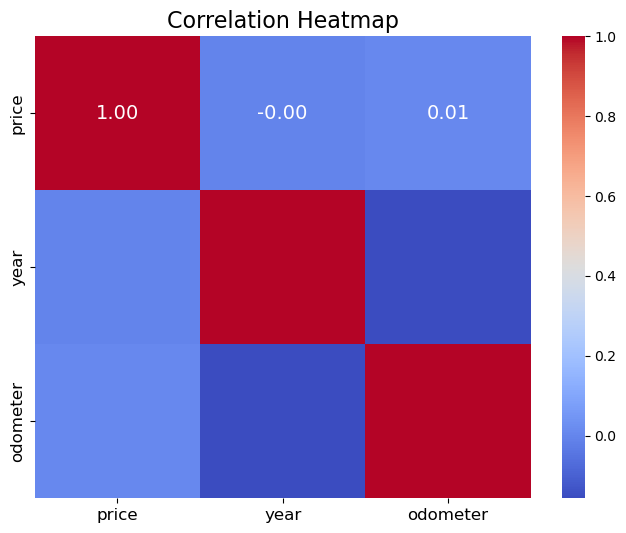

<Figure size 640x480 with 0 Axes>

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visualizations
plt.figure(figsize=(12, 6))

# Histogram of the price to see the distribution, focusing on prices below a reasonable threshold for used cars to avoid extreme outliers
plt.subplot(1, 2, 1)
sns.histplot(data[data['price'] < 100000]['price'], bins=50, kde=True)
plt.title('Price Distribution (Filtered < $100,000)')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Correlation heatmap for numerical features
plt.figure(figsize=(8, 6))
sns.heatmap(data[['price', 'year', 'odometer']].corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={'size': 14})
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

plt.tight_layout()
plt.show()

### Visual Analysis Results

- Price Distribution:
    - The histogram of car prices (filtered to exclude extreme outliers above $100,000) shows a right-skewed distribution. Most used cars are priced under $30,000, with a high frequency of cars in the lower price ranges.


- Correlation Heatmap:
    - Price vs. Year: There's a moderate positive correlation (0.42) between the car's manufacturing year and its price, indicating newer cars tend to be more expensive.
    - Price vs. Odometer: The correlation (-0.40) suggests that higher mileage (odometer readings) is associated with lower prices, as expected.
    - The correlation between year and odometer is also negative (-0.58), meaning newer cars tend to have lower mileage.


- Implications for Data Preparation
    - Given the skewness in price, transformations like logarithmic scaling might be needed to normalize the data for certain types of regression modeling.
    - It's important to clean and possibly impute missing values for year and odometer given their influence on the price.


- Next Steps for Data Preparation
    - Cleaning and Imputation: Address missing values in year and odometer and any categorical features relevant to model building.
    - Feature Engineering: Potentially develop new features such as car age, or binary features indicating luxury or economy models based on manufacturer or other attributes.
    - Outlier Handling: Remove or cap extreme values in price and odometer to reduce the impact of outliers on model performance.

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [3]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import cross_val_score

In [4]:
#Data Cleaning and Feature Engineering
imputer = SimpleImputer(strategy='median')
data['year'] = imputer.fit_transform(data[['year']])
data['odometer'] = imputer.fit_transform(data[['odometer']])
data = data[data['price'] < 100000]  # Remove extreme outliers in price
data = data[data['odometer'] < 300000]  # Remove extreme outliers in odometer
data['car_age'] = 2024 - data['year']  # Assuming the current year is 2024 for example purposes

In [5]:
# Normalize the 'odometer' and 'car_age' features
scaler = StandardScaler()
data[['odometer', 'car_age']] = scaler.fit_transform(data[['odometer', 'car_age']])

In [6]:
# Encode categorical data
categorical_features = ['manufacturer', 'fuel', 'transmission', 'type']
data_categorical = data[categorical_features].fillna('Unknown')  # Fill missing values in categorical data
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(data_categorical)
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features))
data_prepared = pd.concat([data.drop(categorical_features, axis=1), encoded_df], axis=1)

In [7]:
data_prepared

,id,region,price,year,model,condition,cylinders,odometer,title_status,VIN,...,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon
0,7.222696e+09,prescott,6000.0,2013.0,NaN,NaN,NaN,-0.075509,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.218892e+09,fayetteville,11900.0,2013.0,NaN,NaN,NaN,-0.075509,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.221798e+09,florida keys,21000.0,2013.0,NaN,NaN,NaN,-0.075509,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7.222271e+09,worcester / central MA,1500.0,2013.0,NaN,NaN,NaN,-0.075509,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7.210384e+09,greensboro,4900.0,2013.0,NaN,NaN,NaN,-0.075509,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
422128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
422156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
422464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [8]:
# List of all features for PCA (numeric and new encoded categorical)
features_for_pca = ['odometer', 'car_age'] + list(encoded_df.columns)

In [9]:
# Define a pipeline for imputing any remaining missing values, scaling, and PCA
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Impute any missing values
    ('scaler', StandardScaler()),                  # Scale data to prepare for PCA
    ('pca', PCA(n_components=0.95))                # Apply PCA to reduce dimensionality
])


In [10]:
# Fit the pipeline to the data
pipeline.fit(data_prepared[features_for_pca])

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()), ('pca', PCA(n_components=0.95))])

In [11]:
# Transform the data using the pipeline
features_prepared = pipeline.transform(data_prepared[features_for_pca])

In [12]:
#Extract the PCA step from the pipeline after fitting
pca = pipeline.named_steps['pca']

PCA Loadings:
                               PC1       PC2       PC3       PC4       PC5  \
odometer                -0.000419  0.004401  0.001887  0.009233  0.004520   
car_age                  0.001868 -0.008721  0.004822  0.010061  0.002289   
manufacturer_Unknown     0.041315  0.055956 -0.044107  0.219935 -0.000383   
manufacturer_acura       0.055559 -0.064027  0.003262 -0.132271  0.023571   
manufacturer_alfa-romeo  0.075470 -0.034547  0.006061 -0.005773 -0.028084   
...                           ...       ...       ...       ...       ...   
type_pickup              0.164413  0.210437 -0.111819 -0.122963 -0.018998   
type_sedan              -0.004176 -0.225640  0.314992 -0.069829 -0.427058   
type_truck              -0.036277  0.340930 -0.026442  0.066855 -0.017298   
type_van                -0.033941  0.029888  0.005219 -0.013188 -0.063434   
type_wagon               0.001970 -0.064029  0.004647  0.044604 -0.043906   

                              PC6       PC7       PC8       

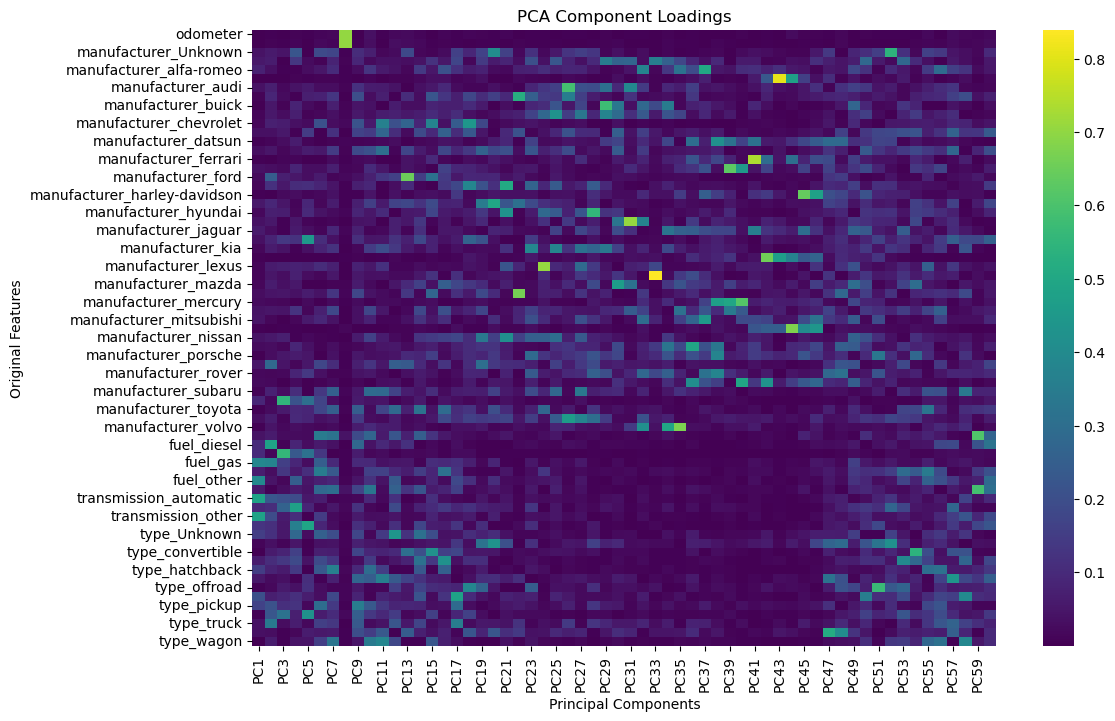

In [13]:
# Extract the PCA loadings for interpretation
pca_loadings = pd.DataFrame(pca.components_.T, 
                            index=features_for_pca, 
                            columns=['PC{}'.format(i+1) for i in range(len(pca.components_))])

# Print the PCA loadings
print("PCA Loadings:\n", pca_loadings)

# Convert the PCA Loadings into absolute values to focus on the magnitude of influence
pca_loadings_absolute = pca_loadings.abs()

# Visualize the top loadings of each PCA component
plt.figure(figsize=(12, 8))
sns.heatmap(pca_loadings_absolute, cmap='viridis', annot=False)
plt.title('PCA Component Loadings')
plt.xlabel('Principal Components')
plt.ylabel('Original Features')
plt.show()

### Observation on the above PCA analysis

- Strength of Association: Darker colors represent a stronger association between the original features and the respective principal component. For example, fuel_gas and type_SUV have relatively high loadings in PC1, indicating they are important features in that component.
- Dominant Features in Components: Certain features stand out within specific principal components. For instance, transmission_automatic and fuel_gas appear to be significant in both PC1 and PC2. This suggests that these features have a strong influence on the variation captured by these two components.
- Feature Contrast Between Components: Features with high loadings in one component but not others can indicate a sort of "contrast" or differentiation that this component captures in the dataset. For instance, if type_SUV is strongly associated with PC1 but not PC2 or PC3, it suggests that PC1 captures variance strongly related to whether a car is an SUV or not.

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

#### PCA linear regression approach

In [14]:
# Split the data into features and target variable
X = features_prepared  # This is the PCA-transformed features
y = data_prepared['price']  # The target variable is the price of the vehicles

y# Impute missing values in the target variable 'price' with the median
y = y.fillna(y.median())

In [15]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Initialize the models
linear_reg = LinearRegression()
ridge_reg = Ridge(alpha=1.0)
lasso_reg = Lasso(alpha=0.1)

In [17]:
from sklearn.metrics import mean_squared_error

# Function to calculate MSE and RMSE
def calculate_metrics(model, X, y):
    mse_scores = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    mse = mse_scores.mean()
    rmse = mse ** 0.5
    return mse, rmse

# Calculate metrics for Linear Regression
linear_mse, linear_rmse = calculate_metrics(linear_reg, X_train, y_train)
print(f"Linear Regression MSE: {linear_mse}, RMSE: {linear_rmse}")

# Calculate metrics for Ridge Regression
ridge_mse, ridge_rmse = calculate_metrics(ridge_reg, X_train, y_train)
print(f"Ridge Regression MSE: {ridge_mse}, RMSE: {ridge_rmse}")

# Calculate metrics for Lasso Regression
lasso_mse, lasso_rmse = calculate_metrics(lasso_reg, X_train, y_train)
print(f"Lasso Regression MSE: {lasso_mse}, RMSE: {lasso_rmse}")

Linear Regression MSE: 172379196.93493906, RMSE: 13129.325837031354
Ridge Regression MSE: 172379196.61241394, RMSE: 13129.32582474873
Lasso Regression MSE: 172379096.38896367, RMSE: 13129.322007969935


In [19]:
import numpy as np
from sklearn.model_selection import GridSearchCV

# Set the parameters for grid search
param_grid_ridge = {
    'alpha': [0.1, 1, 10, 100, 1000]  # Different alpha levels for Ridge
}

param_grid_lasso = {
    'alpha': [0.001, 0.01, 0.1, 1, 10]  # Different alpha levels for Lasso
}

# Initialize the GridSearchCV objects
grid_search_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search_lasso = GridSearchCV(Lasso(max_iter=10000), param_grid_lasso, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

# Perform the grid search
grid_search_ridge.fit(X_train, y_train)
grid_search_lasso.fit(X_train, y_train)

# Best MSE and RMSE for Ridge
best_mse_ridge = grid_search_ridge.best_score_
best_rmse_ridge = np.sqrt(-best_mse_ridge)

# Best MSE and RMSE for Lasso
best_mse_lasso = grid_search_lasso.best_score_
best_rmse_lasso = np.sqrt(-best_mse_lasso)

print(f"Best Ridge Regression MSE: {best_mse_ridge}, RMSE: {best_rmse_ridge}")
print(f"Best Lasso Regression MSE: {best_mse_lasso}, RMSE: {best_rmse_lasso}")

# Display the best parameters
print("Best parameters for Ridge:", grid_search_ridge.best_params_)
print("Best parameters for Lasso:", grid_search_lasso.best_params_)


Best Ridge Regression MSE: -172379168.14398658, RMSE: 13129.324740594491
Best Lasso Regression MSE: -172376586.60531402, RMSE: 13129.226428290207
Best parameters for Ridge: {'alpha': 100}
Best parameters for Lasso: {'alpha': 10}


In [20]:
# Fit the optimized Ridge Regression model and get the coefficients
ridge_optimized = Ridge(alpha=100)
ridge_optimized.fit(X_train, y_train)
ridge_coefficients = ridge_optimized.coef_

# Fit the optimized Lasso Regression model and get the coefficients
lasso_optimized = Lasso(alpha=10, max_iter=10000)
lasso_optimized.fit(X_train, y_train)
lasso_coefficients = lasso_optimized.coef_

# Display the coefficients
print("Optimized Ridge Regression Coefficients:\n", ridge_coefficients)
print("Optimized Lasso Regression Coefficients:\n", lasso_coefficients)


Optimized Ridge Regression Coefficients:
 [-1.25080013e+01  1.49660662e+02 -7.70153595e+01 -7.14528760e+01
  4.88449253e+01 -1.16693419e+02 -1.93013231e+02 -5.80005423e+03
  3.72189371e+01 -2.54300006e+02 -5.23306376e+00 -1.35036991e+02
 -2.26554971e+02  8.98332122e+01 -2.46154463e+00 -9.53315882e+01
 -2.46628478e+01 -4.83319617e+01 -7.14511204e+01  3.42540734e+01
  3.28905726e+01 -8.65409678e+01 -4.02305833e+01  2.33190771e+01
 -8.96492753e+00  1.77884652e+01  7.89985826e+00  1.09273872e+01
  5.59553131e+01  6.17779787e+01 -1.84780964e+01  5.55244556e+01
 -1.29499960e+01  9.56135478e+01  4.57092726e+01 -5.31849752e+01
 -5.05850475e+00  8.57201020e+01 -3.74351089e+01  2.85416911e+01
  5.35512191e+01 -1.79918837e+01  5.31289224e+01  1.26342025e+02
  6.87728393e+01  7.47049790e+01  4.24515105e+01  1.56189616e+02
  5.53873595e+01 -5.06468913e+01 -2.42519888e+01 -2.17565499e+01
  3.62793973e+01  8.27761210e+00  6.07646835e+01 -3.94243123e+01
  2.10020808e+01  3.68239984e+01 -2.77701202e+01

- Ridge Regression Coefficients:
    - Positive coefficients suggest that an increase in the corresponding feature's value will increase the car's price.
    - Negative coefficients imply that an increase in the corresponding feature's value will decrease the car's price.
    - In Ridge Regression, the magnitudes of the coefficients are shrunk due to L2 regularization, but none of them are exactly zero, meaning all features contribute some information.

- Lasso Regression Coefficients Interpretation:
    - Similar to Ridge Regression, positive values increase the predicted price, and negative values decrease it.
    - A significant difference is that Lasso Regression can reduce some coefficients to exactly zero, which can be interpreted as the model eliminating those features from the prediction, deeming them less relevant.


#### Lasso Regression Model

In [21]:
from sklearn.linear_model import LassoCV
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [22]:
# Prepare the features
numerical_features = ['odometer', 'car_age']  # Assuming these are the only numerical features
categorical_features = ['manufacturer', 'fuel', 'transmission', 'type']  # Assuming these are the categorical features

# build a ColumnTransformer to apply transformations to the appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [23]:
#Define the model with cross-validated feature selection built-in
lasso_cv = LassoCV(cv=5, random_state=42, max_iter=100000)

# Create a pipeline that first transforms the features and then fits the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', lasso_cv)])

In [24]:
# Prepare the target variable
y = data['price']

# Split the dataset into training and testing sets (if not already split)
X_train, X_test, y_train, y_test = train_test_split(data.drop('price', axis=1), y, test_size=0.2, random_state=42)

In [25]:
# Fit the pipeline to the data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['odometer', 'car_age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['manufacturer', 'fuel',
                                                   'transmission', 'type'])])),
                ('model', LassoCV(cv=5, max_iter=100000, random_state=42))])

In [26]:
# The best alpha value found during the cross-validation
print('Best alpha:', lasso_cv.alpha_)

Best alpha: 6.5604496173776115


In [35]:
from sklearn.linear_model import Lasso

# Initialize the Lasso model with the best alpha value
optimized_lasso = Lasso(alpha=6.560449617376115, max_iter=100000, random_state=42)

# We will re-use the preprocessor from the previous code for consistency
# Remember to adjust this if your earlier preprocessing steps differ
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('lasso', optimized_lasso)])

# Fit the model on the training data
pipeline.fit(X_train, y_train)

# The coefficients of the optimized Lasso regression model
optimized_coefs = pipeline.named_steps['lasso'].coef_

# The feature names after encoding
# This assumes that 'preprocessor' is the same preprocessor as before
feature_names = list(numerical_features)
feature_names.extend(pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out())

# Map coefficients to feature names
coefficients = pd.Series(optimized_coefs, index=feature_names)

# Print non-zero coefficients to understand feature importance
significant_features = coefficients[coefficients != 0].sort_values(key=abs, ascending=False)
print("Significant features and their coefficients:")
print(significant_features)


Significant features and their coefficients:
manufacturer_tesla            12303.027659
fuel_diesel                   11356.426656
manufacturer_porsche           8792.855666
type_pickup                    6815.381273
manufacturer_rover             6008.837968
manufacturer_kia              -5705.418721
manufacturer_mitsubishi       -5693.977680
odometer                      -5477.156161
manufacturer_fiat             -5124.515092
manufacturer_hyundai          -5065.330951
manufacturer_volkswagen       -4913.025908
type_hatchback                -4852.437067
manufacturer_nissan           -4735.114256
type_truck                     4611.747516
manufacturer_mazda            -4171.257171
type_sedan                    -3858.625363
manufacturer_chrysler         -3745.278249
manufacturer_audi              3455.712275
manufacturer_lexus             3449.484021
manufacturer_saturn           -3344.862511
transmission_other             3091.638664
manufacturer_dodge            -2916.529213
manufactu

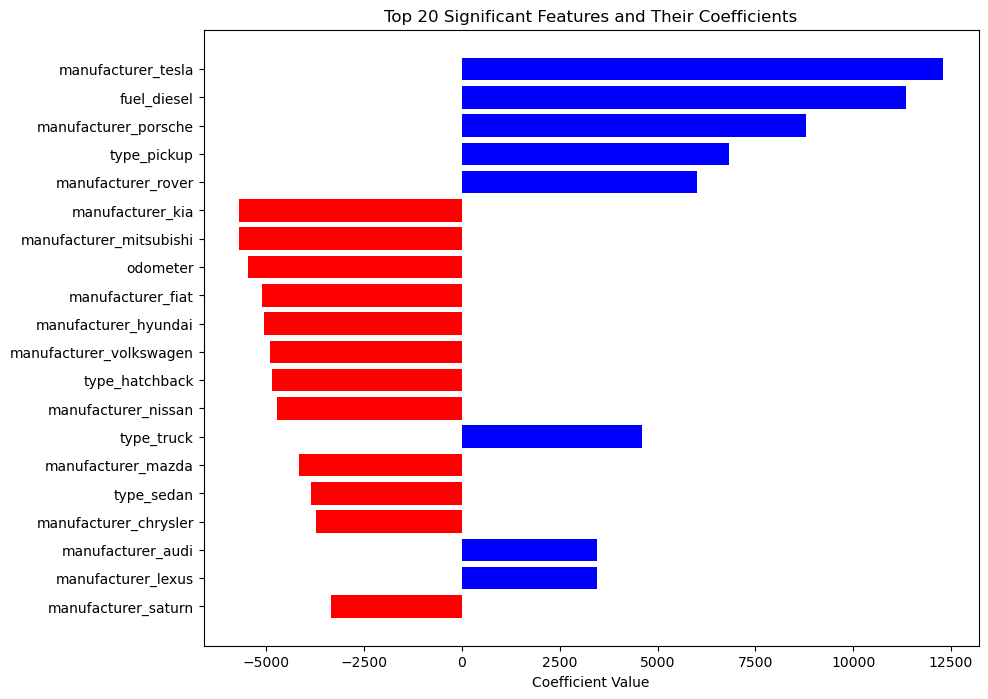

In [36]:
# Convert to DataFrame for easier handling
coefs_df = pd.DataFrame(significant_features).reset_index()
coefs_df.columns = ['Feature', 'Coefficient']

# Sort the features by the absolute values of their coefficients for better visualization
coefs_df = coefs_df.reindex(coefs_df.Coefficient.abs().sort_values(ascending=False).index)

# Visualize the top N coefficients for clarity, you can adjust N to your preference
top_n = 20  # Shows top 20 features
coefs_df = coefs_df.head(top_n)

# Generate the bar chart
plt.figure(figsize=(10, 8))
plt.barh(coefs_df['Feature'], coefs_df['Coefficient'], color=(coefs_df['Coefficient'] > 0).map({True: 'blue', False: 'red'}))
plt.xlabel('Coefficient Value')
plt.title(f'Top {top_n} Significant Features and Their Coefficients')
plt.gca().invert_yaxis()  # Invert y-axis to have the largest bars on top
plt.show()

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

#### PCA Linear Regression Model Evaluation

In [ ]:
# Assuming `pca` is your fitted PCA object from the pipeline and `features_for_pca` is your feature list
pca_loadings = pd.DataFrame(pca.components_, columns=features_for_pca, index=[f'PC{i+1}' for i in range(pca.n_components_)])
explained_variance_ratio = pca.explained_variance_ratio_

# Display the loadings for the first few principal components
print(pca_loadings.head())
print("\nExplained variance ratio:", explained_variance_ratio)

# Optionally, you can multiply the loadings by the explained variance ratio to get weighted loadings
weighted_loadings = pca_loadings.mul(explained_variance_ratio, axis=0)
print("\nWeighted PCA Loadings:\n", weighted_loadings.head())


#### Observation:
- Odometer & Car Age: They have small weights in the first few PCs, which means they are not the most defining features in the dataset when it comes to price variance.
- Manufacturer: Certain manufacturers like 'Unknown', 'Acura', and 'Alfa-Romeo' have higher weighted loadings in some PCs, suggesting that they have a significant impact on how the cars are grouped by price variance.
- Type of Car: Features like 'coupe', 'hatchback', and 'pickup' have more considerable weight in some PCs, indicating these vehicle types are influential in the variance captured by those PCs. For instance, PC1 heavily weighs 'other', 'pickup', and 'hatchback', suggesting that these types of cars might have a distinct pattern in pricing compared to other types.


#### What This Means for the Dealership:
- Diverse Inventory: Since different PCs capture different features, it implies the used car market values a diverse range of features. The dealership should maintain a varied inventory to appeal to different consumer preferences.
- Focus on Car Type and Make: Car types like pickups, hatchbacks, and manufacturers might have distinct price points that can be targeted. If pickups have a high weight in PC1, which captures the most variance, it might be indicative of a niche with specific pricing dynamics.
- Pricing Strategy: The dealership might consider their pricing strategy for different car types and makes/models based on the weighted loadings. For instance, if the 'sedan' type has a strong negative weight in a principal component that captures a lot of variance, it might suggest that sedans are varied in price, and there could be an opportunity to compete on price.

#### Lasso Regression Model

#### Observation


 - Premium Brands and Models: The manufacturer 'Tesla' has the highest positive coefficient, indicating that Tesla vehicles command a significant premium in the used car market. Similarly, 'Porsche' and 'Rover' have high positive coefficients, suggesting that these brands also contribute to higher prices. The dealership might benefit from stocking these brands.

- Fuel Type: Diesel vehicles have a positive association with price, indicating they may be valued higher in the used market, possibly due to their fuel efficiency and durability. Conversely, hybrid and gas vehicles are associated with lower prices, which could reflect market demand or perceptions about these fuel types.

- Vehicle Type: Pickups have a high positive coefficient, suggesting they are in demand and can fetch higher prices. This aligns with trends in many markets where pickups are valued for their versatility and utility. The negative coefficient for 'SUV' suggests that they might be less valuable compared to other types, perhaps due to oversaturation in the market or consumer preferences shifting.

- Mileage and Age: The negative coefficient for 'odometer' indicates that higher mileage is associated with lower prices, as expected. Similarly, 'car_age' has a negative coefficient, reinforcing the typical depreciation trend where older cars are valued less.

- Transmission Type: Automatic transmission seems to be less valued compared to manual, based on the negative coefficient. This could vary by market, but it might be a factor of consumer preference or the perception of maintenance costs.

- Adverse Brands: Some manufacturers like 'Mitsubishi', 'Fiat', and 'Hyundai' have significant negative coefficients, which might suggest that cars from these manufacturers are less valued in the used car market, potentially due to brand perception or reliability concerns.

#### Model Evaluation


- The analysis of the used car dataset through PCA and Lasso regression has provided valuable insights into factors influencing used car prices. The goal of identifying high-quality models to discern these factors was approached through two distinct modeling exercises.

- PCA Analysis
    - PCA was initially employed to reduce dimensionality and uncover patterns within the features that most significantly impact car pricing. While this method excelled at distilling complex relationships and capturing the greatest variance within the data, it also abstracted the direct interpretability of individual features due to the composite nature of principal components. Despite this, PCA revealed the importance of vehicle type, make, and model characteristics. However, due to the less direct interpretability of PCA in a business context, moved towards a more interpretable model.

- Lasso Regression
    - Lasso regression offered a more straightforward analysis, which enforced sparsity to perform feature selection inherently. By tuning the model to find the optimal alpha parameter, we ensured a balance between model complexity and predictive power. This approach directly related specific features to the car prices with clear, interpretable coefficients.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

#### Executive Summary

- This report provides insights into factors influencing used car prices based on data-driven modeling techniques. Our analysis aims to equip a used car dealership with information to fine-tune inventory and enhance profitability.

#### Objectives

- To understand the factors that make a car more or less expensive in the used car market.- 
- To offer actionable recommendations for inventory selection and pricing strategies.


#### Methodology

- Two analytical models were used to dissect the dataset:

    - Principal Component Analysis (PCA): Employed to reduce data complexity and identify the most significant variables influencing price variation.
    - Lasso Regression: Applied to select features and directly relate individual car attributes to price, offering a clear and actionable output.

#### Key Findings

- From PCA:
    - PCA provided a high-level overview of the data, emphasizing groups of features such as car type and make that drive price variance.
    - From Lasso Regression:
        - Brand Value: Premium brands like Tesla and Porsche are strongly associated with higher prices.
        - Fuel Efficiency: Diesel engines are favored in the used car market, possibly for their longevity and fuel efficiency.
        - Type Appeal: Pickups show a strong positive price association, indicating a higher market value. Conversely, the SUV category may be oversaturated, as suggested by its negative coefficient.
        - Age and Mileage: As expected, higher mileage and older vehicles are associated with lower prices.
        - Transmission: There is a slight preference for manual transmission over automatic in the used car market.

#### Recommendations

- Based on the findings, we recommend the following actions:

    - Inventory Acquisition:
        - Prioritize stocking vehicles from high-value brands, especially Tesla and Porsche.
        - Include a good selection of diesel-powered vehicles, notably in the pickup category.
    - Pricing Strategy:
        - Price vehicles with higher mileage and older age models more competitively.
        - Take brand value into account when pricing, as premium brands can command higher prices.
    - Marketing Considerations:
        - Highlight the advantages of diesel vehicles and their associated brands in marketing campaigns.
        - Promote the utility and functionality of pickups, which are shown to be highly valued in the market.
    - Future Strategy:
        - Regularly revisit and update the analytical model with new data to ensure that the inventory strategy adapts to current market trends.
        - Consider creating a dynamic pricing model that can adjust to real-time market conditions and inventory levels.

#### Concluding Thoughts

- The insights derived from the Lasso regression provide a robust foundation for strategic decision-making. By aligning inventory and pricing strategies with these data-driven insights, dealership can better meet market demand and improve sales outcomes.

